# Decision Trees Machine Learning Project

โครงการนี้เป็นการสำรวจและสร้างแบบจำลอง Decision Trees โดยใช้ข้อมูลจากโลกจริง เราจะใช้ชุดข้อมูล Titanic เพื่อทำนายการรอดชีวิต ทำการวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis) จัดการและเตรียมข้อมูล (Preprocessing) และวิเคราะห์ผลลัพธ์ของแบบจำลอง


## Introduction

Decision Trees เป็นอัลกอริทึมการเรียนรู้ของเครื่อง (Machine Learning Algorithm) ที่ได้รับความนิยม ใช้ในการทำงานทั้งแบบ การจำแนกประเภท (Classification) และ การถดถอย (Regression) โดยหลักการทำงานคือการแบ่งชุดข้อมูลออกเป็นส่วนย่อย ๆ อย่างต่อเนื่องตามค่าของคุณลักษณะ (Feature Values) ความเรียบง่ายและความสามารถในการตีความได้ของ Decision Trees ทำให้มันเป็นเครื่องมือที่มีคุณค่าสำหรับการทำความเข้าใจรูปแบบของข้อมูลและการสร้างแบบจำลองเพื่อการพยากรณ์ผลลัพธ์

วัตถุประสงค์ของโครงการนี้:

- ทำความเข้าใจกลไกของ Decision Trees รวมถึงแนวคิดเรื่อง Entropy, Information Gain, และ Gini Impurity
- วิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis) เพื่อค้นหารูปแบบที่ซ่อนอยู่ในข้อมูล
- จัดเตรียมและประมวลผลข้อมูล (Preprocessing) เพื่อใช้ในการสร้างแบบจำลองการเรียนรู้ของเครื่อง
- ฝึกและประเมินประสิทธิภาพของแบบจำลอง Decision Tree Classifier โดยใช้ข้อมูลจากโลกจริง
- สร้างการแสดงผลเชิงภาพของเส้นทางการตัดสินใจ (Decision Path) และทำความเข้าใจความสำคัญของแต่ละคุณลักษณะ (Feature Importances)


In [53]:
# นำเข้าไลบรารีที่จำเป็นสำหรับการวิเคราะห์และสร้างแบบจำลอง
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ปิดคำเตือนเพื่อไม่ให้รบกวนผลการแสดง
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าสไตล์ของกราฟ
sns.set(style='whitegrid')
%matplotlib inline


## Dataset Description

ชุดข้อมูลที่ใช้ในโครงการนี้คือ Titanic Dataset ซึ่งประกอบด้วยข้อมูลรายละเอียดของผู้โดยสารบนเรือไททานิก โดยมีคุณลักษณะสำคัญดังนี้:

- **Pclass**: ชั้นของผู้โดยสาร (1st, 2nd, 3rd) แสดงถึงสถานะทางสังคมและเศรษฐกิจ
- **Sex**: เพศของผู้โดยสาร
- **Age**: อายุของผู้โดยสาร
- **SibSp**: จำนวนพี่น้องหรือคู่สมรสที่อยู่บนเรือ
- **Parch**: จำนวนบิดามารดาหรือบุตรที่อยู่บนเรือ
- **Fare**: ราคาค่าโดยสารที่ผู้โดยสารจ่าย
- **Embarked**: ท่าเรือที่ผู้โดยสารขึ้นเรือ (C = Cherbourg; Q = Queenstown; S = Southampton)

ตัวแปรเป้าหมาย (Target Variable) คือ **Survived** ซึ่งบ่งบอกว่าผู้โดยสารรอดชีวิต (1) หรือไม่รอดชีวิต (0)


In [54]:
# โหลดชุดข้อมูล Titanic จากไฟล์ titanic.csv (ต้องอยู่โฟลเดอร์เดียวกับโน้ตบุ๊ก)
titanic = pd.read_csv("titanic.csv")

# แสดงตัวอย่างข้อมูล 5 แถวแรกเพื่อดูโครงสร้างเบื้องต้น
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing (ตาม Experimental Guide – Experiment 3)

ในส่วนนี้จะประมวลผลข้อมูลตามกลยุทธ์ที่กำหนดในคู่มือการทดลอง:

- ลบคอลัมน์ที่ไม่จำเป็น: `PassengerId`, `Name`, `Ticket`, `Cabin`
- จัดการค่าที่หายไป (Missing Values):
  - `Age` เติมด้วยค่าเฉลี่ย
  - `Embarked` เติมด้วยค่าที่พบบ่อยที่สุด (Mode)
- เข้ารหัสตัวแปรเชิงหมวดหมู่ (Sex, Embarked)
- แยกข้อมูลเป็นชุดฝึก (Training Set) และชุดตรวจสอบ (Validation Set) ในสัดส่วนประมาณ 80% / 20%


In [55]:
# ลบคอลัมน์ที่ไม่จำเป็นตามคู่มือการทดลอง
cols_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
titanic_clean = titanic.drop(columns=cols_to_drop)

# จัดการค่าที่หายไปในคอลัมน์ Age ด้วยค่าเฉลี่ย
titanic_clean["Age"] = titanic_clean["Age"].fillna(titanic_clean["Age"].mean())

# จัดการค่าที่หายไปในคอลัมน์ Embarked ด้วยค่าที่พบบ่อยที่สุด (mode)
titanic_clean["Embarked"] = titanic_clean["Embarked"].fillna(
    titanic_clean["Embarked"].mode()[0]
)

# เข้ารหัสตัวแปรเชิงหมวดหมู่ Sex และ Embarked ด้วย One-Hot Encoding
titanic_encoded = pd.get_dummies(titanic_clean, columns=["Sex", "Embarked"])

# แยก Features และ Label
X = titanic_encoded.drop(columns=["Survived"])
y = titanic_encoded["Survived"]

# แบ่งข้อมูลเป็นชุดฝึก (80%) และชุดตรวจสอบ (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_val.shape


((712, 10), (179, 10))

## Decision Tree ด้วย sklearn (อ้างอิง / เปรียบเทียบ)

ส่วนนี้ใช้ `DecisionTreeClassifier` จากไลบรารี `scikit-learn` เพื่อสร้างแบบจำลอง Decision Tree สำหรับเปรียบเทียบผลกับการ Implement ID3 ด้วยตนเอง


In [56]:
# สร้างและฝึก Decision Tree ด้วย sklearn (ใช้ค่าเริ่มต้นพื้นฐาน)
sk_tree = DecisionTreeClassifier(random_state=42)
sk_tree.fit(X_train, y_train)

# ทำนายผลบนชุดตรวจสอบ (Validation Set)
y_pred_sk = sk_tree.predict(X_val)

print("Accuracy (sklearn DecisionTree):", accuracy_score(y_val, y_pred_sk))
print(classification_report(y_val, y_pred_sk))


Accuracy (sklearn DecisionTree): 0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Mathematical Explanation of Decision Trees / ID3

ในส่วนนี้เน้นแนวคิดสำคัญที่ใช้ในอัลกอริทึม ID3:

- **Entropy**: วัดความไม่แน่นอนหรือความไม่บริสุทธิ์ของข้อมูล
- **Information Gain**: ค่าการลดลงของ Entropy หลังจากแบ่งข้อมูลตามฟีเจอร์หนึ่ง ๆ
- **กระบวนการสร้างต้นไม้**: เลือกฟีเจอร์ที่ให้ Information Gain สูงสุด แล้วแบ่งข้อมูลซ้ำ ๆ แบบรีเคอร์ซีฟจนกว่าจะถึงเงื่อนไขหยุด


## ID3 Implementation (เขียนเองตาม Experimental Guide)

ในส่วนนี้เป็นการ Implement อัลกอริทึม ID3 ด้วยตนเอง:

- ฟังก์ชันคำนวณ Entropy
- ฟังก์ชันคำนวณ Information Gain
- ฟังก์ชันเลือกฟีเจอร์และแบ่งชุดข้อมูล
- ฟังก์ชันสร้างต้นไม้แบบรีเคอร์ซีฟตามกติกาของ ID3


In [57]:
import math
from collections import Counter

# ฟังก์ชันคำนวณ Entropy ของตัวแปรเป้าหมาย (label)
def entropy(y):
    """คำนวณค่าเอนโทรปีของชุดข้อมูล y (Series ของ label)"""
    counts = Counter(y)
    total = len(y)
    return -sum((c / total) * math.log2(c / total) for c in counts.values())

# ฟังก์ชันคำนวณ Information Gain ของฟีเจอร์หนึ่งคอลัมน์
def information_gain(X_col, y):
    """คำนวณ Information Gain เมื่อแบ่งชุดข้อมูลด้วยฟีเจอร์ X_col"""
    parent_entropy = entropy(y)
    total = len(y)
    values = X_col.unique()
    child_entropy = 0.0
    for v in values:
        idx = (X_col == v)
        y_child = y[idx]
        weight = len(y_child) / total
        child_entropy += weight * entropy(y_child)
    return parent_entropy - child_entropy

# ฟังก์ชันหาคลาสส่วนใหญ่ (ใช้ในกรณีต้องหยุดแบ่งต่อ)
def majority_class(y):
    """คืนค่าคลาสที่พบมากที่สุดใน y ถ้า y ว่างให้คืนค่า 0 เป็นดีฟอลต์"""
    if len(y) == 0:
        return 0   # หรือจะเปลี่ยนเป็น 1 ก็ได้ตามที่ต้องการ
    return Counter(y).most_common(1)[0][0]

# ฟังก์ชันสร้างต้นไม้แบบ ID3 ด้วยรีเคอร์ชัน
def build_id3_tree(X, y, feature_names):
    """
    สร้างต้นไม้ตัดสินใจด้วยอัลกอริทึม ID3
    X: DataFrame ของฟีเจอร์
    y: Series ของ label
    feature_names: รายชื่อคอลัมน์ฟีเจอร์ที่ยังเหลือให้เลือกใช้
    """
    # ถ้าไม่มีตัวอย่างในโหนดนี้เลย ให้คืน leaf ด้วยคลาสดีฟอลต์
    if len(y) == 0:
        return {"type": "leaf", "class": 0}

    # เงื่อนไขหยุดที่ 1: ถ้าทุกตัวอย่างในโหนดเป็นคลาสเดียวกัน
    if len(set(y)) == 1:
        return {"type": "leaf", "class": y.iloc[0]}

    # เงื่อนไขหยุดที่ 2: ถ้าไม่มีฟีเจอร์เหลือให้แบ่งต่อ
    if len(feature_names) == 0:
        return {"type": "leaf", "class": majority_class(y)}

    # เลือกฟีเจอร์ที่ให้ Information Gain สูงสุด
    gains = []
    for f in feature_names:
        gains.append((f, information_gain(X[f], y)))
    best_feature, best_gain = max(gains, key=lambda x: x[1])

    # ถ้า Information Gain ไม่ได้ช่วยลดเอนโทรปีมาก (<= 0) ให้หยุดและใช้คลาสส่วนใหญ่
    if best_gain <= 0:
        return {"type": "leaf", "class": majority_class(y)}

    tree = {
        "type": "node",
        "feature": best_feature,
        "children": {}
    }

    # สำหรับค่าทุกค่าของฟีเจอร์ที่เลือก สร้างกิ่งย่อยและเรียกรีเคอร์ชัน
    for v in X[best_feature].unique():
        idx = (X[best_feature] == v)
        X_sub = X[idx].drop(columns=[best_feature])
        y_sub = y[idx]

        # ถ้า subset ว่าง ไม่ต้องรีเคอร์ส ให้สร้าง leaf ด้วย majority class ของโหนดปัจจุบัน
        if len(y_sub) == 0:
            tree["children"][v] = {"type": "leaf", "class": majority_class(y)}
        else:
            sub_features = [f for f in feature_names if f != best_feature]
            tree["children"][v] = build_id3_tree(X_sub, y_sub, sub_features)

    return tree

## การเตรียมข้อมูลสำหรับ ID3 (จัดกลุ่มฟีเจอร์เชิงตัวเลข)

อัลกอริทึม ID3 ทำงานได้สะดวกกับฟีเจอร์เชิงหมวดหมู่ ดังนั้นฟีเจอร์ตัวเลข เช่น `Age` และ `Fare` จะถูกแบ่งช่วง (binning) เป็นกลุ่ม เพื่อให้ใช้เป็น category ได้ง่ายขึ้น


In [58]:
# คัดลอกชุดฝึกและชุดตรวจสอบมาเตรียมสำหรับ ID3
X_train_id3 = X_train.copy()
X_val_id3 = X_val.copy()

# แบ่งช่วงของ Age เป็นกลุ่ม
X_train_id3["AgeBin"] = pd.cut(
    X_train_id3["Age"],
    bins=[0, 16, 30, 50, 80],
    labels=["child", "young", "adult", "old"]
)
X_val_id3["AgeBin"] = pd.cut(
    X_val_id3["Age"],
    bins=[0, 16, 30, 50, 80],
    labels=["child", "young", "adult", "old"]
)

# แบ่งช่วงของ Fare เป็นกลุ่ม
X_train_id3["FareBin"] = pd.cut(
    X_train_id3["Fare"],
    bins=[0, 10, 30, 100, 600],
    labels=["very_low", "low", "mid", "high"]
)
X_val_id3["FareBin"] = pd.cut(
    X_val_id3["Fare"],
    bins=[0, 10, 30, 100, 600],
    labels=["very_low", "low", "mid", "high"]
)

# เลือกฟีเจอร์ที่ต้องการใช้ใน ID3 (เน้นฟีเจอร์ที่มีความหมายและไม่มากเกินไป)
id3_features = [
    "Pclass", "SibSp", "Parch", "AgeBin", "FareBin"
] + [c for c in X_train_id3.columns if c.startswith("Sex_") or c.startswith("Embarked_")]

X_train_id3 = X_train_id3[id3_features]
X_val_id3 = X_val_id3[id3_features]

# สร้างต้นไม้ด้วย ID3
feature_names = list(X_train_id3.columns)
id3_tree = build_id3_tree(X_train_id3, y_train, feature_names)

id3_tree  # แสดงโครงสร้างต้นไม้ในรูปแบบ dict


{'type': 'node',
 'feature': 'Sex_female',
 'children': {np.False_: {'type': 'node',
   'feature': 'FareBin',
   'children': {'mid': {'type': 'node',
     'feature': 'SibSp',
     'children': {np.int64(0): {'type': 'node',
       'feature': 'Pclass',
       'children': {np.int64(3): {'type': 'node',
         'feature': 'AgeBin',
         'children': {'young': {'type': 'leaf', 'class': 1},
          'adult': {'type': 'leaf', 'class': np.int64(1)}}},
        np.int64(1): {'type': 'node',
         'feature': 'AgeBin',
         'children': {'old': {'type': 'node',
           'feature': 'Parch',
           'children': {np.int64(0): {'type': 'node',
             'feature': 'Embarked_C',
             'children': {np.True_: {'type': 'leaf', 'class': 0},
              np.False_: {'type': 'leaf', 'class': 0}}},
            np.int64(1): {'type': 'leaf', 'class': np.int64(0)}}},
          'young': {'type': 'node',
           'feature': 'Embarked_C',
           'children': {np.False_: {'type': 'nod

## ฟังก์ชันทำนายผลด้วยต้นไม้ ID3 และการประเมินผล

ฟังก์ชันด้านล่างใช้เดินตามกิ่งของต้นไม้จาก root ไปยัง leaf เพื่อตัดสินใจคลาสของตัวอย่างแต่ละตัว และประเมินความแม่นยำของโมเดลบนชุดตรวจสอบ


In [59]:
def id3_predict_one(tree, x_row):
    """ทำนายคลาสของตัวอย่างหนึ่งแถวจากต้นไม้ที่สร้างด้วย ID3"""
    if tree["type"] == "leaf":
        return tree["class"]
    f = tree["feature"]
    v = x_row[f]
    child = tree["children"].get(v)
    # ถ้าไม่มีสาขาสำหรับค่าฟีเจอร์นี้ ให้ fallback เป็นคลาส 0 (หรือจะเปลี่ยนเป็น majority class ก็ได้)
    if child is None:
        return 0
    return id3_predict_one(child, x_row)


def id3_predict(tree, X):
    """ทำนายคลาสของทุกตัวอย่างใน DataFrame X ด้วยต้นไม้ ID3"""
    return np.array([id3_predict_one(tree, X.iloc[i]) for i in range(len(X))])


# ทำนายผลบนชุดตรวจสอบ
y_pred_id3 = id3_predict(id3_tree, X_val_id3)

print("Accuracy :", accuracy_score(y_val, y_pred_id3))
print(classification_report(y_val, y_pred_id3))


Accuracy : 0.7821229050279329
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       110
           1       0.80      0.58      0.67        69

    accuracy                           0.78       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.78      0.78      0.77       179



## การแสดงโครงสร้างต้นไม้ ID3 ในรูปแบบตัวอักษร

เพื่อช่วยให้เข้าใจการตัดสินใจของโมเดล สามารถพิมพ์โครงสร้างต้นไม้ในรูปแบบที่อ่านง่ายด้วยการเยื้องบรรทัด


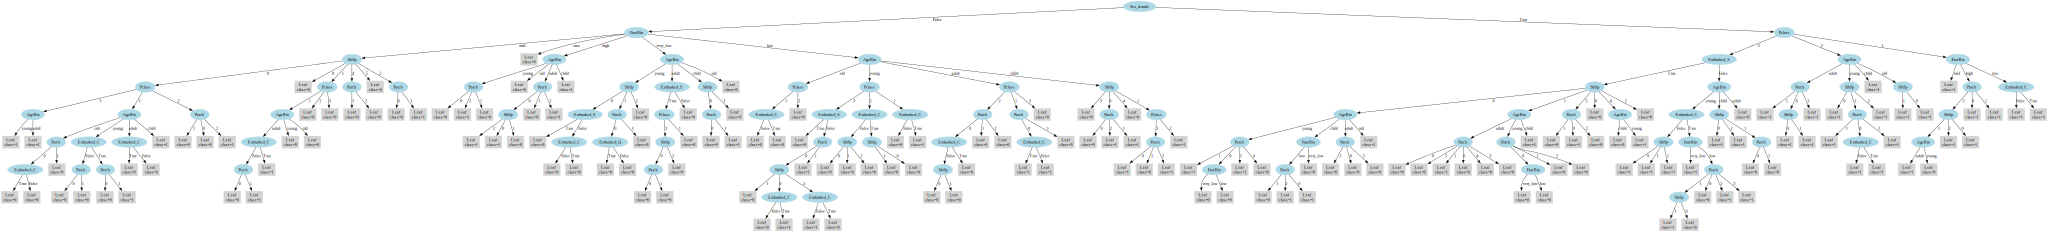

In [60]:
from graphviz import Digraph

def visualize_id3_tree(tree, graph=None, node_name="root"):
    """
    แปลงต้นไม้ ID3 (รูปแบบ dict แบบเดียวกับ id3_tree) ให้เป็นกราฟของ Graphviz

    tree      : โครงสร้างต้นไม้แบบ dict (เช่น id3_tree)
    graph     : อ็อบเจ็กต์ Digraph (ใช้ภายในฟังก์ชัน)
    node_name : ชื่อโหนดปัจจุบัน (ใช้สร้างชื่อไม่ให้ซ้ำ)
    """
    # ถ้ายังไม่มีกราฟ ให้สร้างใหม่
    if graph is None:
        graph = Digraph()

    # ถ้าเป็น leaf ให้สร้างโหนดใบ
    if tree["type"] == "leaf":
        label = f"Leaf\nclass={tree['class']}"
        graph.node(node_name, label=label, shape="box", style="filled", color="lightgrey")
        return graph

    # ถ้าเป็น node ภายใน ให้สร้างโหนดด้วยชื่อฟีเจอร์
    feature = tree["feature"]
    graph.node(node_name, label=feature, shape="ellipse", style="filled", color="lightblue")

    # วาดกิ่งสำหรับค่าทุกค่าใน children
    for value, child in tree["children"].items():
        child_name = f"{node_name}_{str(value)}"
        # สร้างโหนดลูก (จะถูกกำหนด label ภายใน recursive call)
        graph.node(child_name)
        # เชื่อมเส้นจากโหนดปัจจุบันไปยังโหนดลูก พร้อม label เป็นค่าฟีเจอร์
        graph.edge(node_name, child_name, label=str(value))
        # เรียก recursive เพื่อสร้างโครงสร้างของ subtree
        visualize_id3_tree(child, graph, child_name)

    return graph

# ใช้งานกับ id3_tree
g = visualize_id3_tree(id3_tree)

# แสดงใน Jupyter (ถ้าติดตั้ง dot แล้ว)
g

# หรือบันทึกเป็นไฟล์ภาพ
# g.render("id3_tree_titanic", format="png", cleanup=True)
